In [25]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [35]:
# Load your dataset
df = pd.read_csv("data.csv")

# Display the first 5 rows
df.head()


,review,model,sentiment
0,The movie was a complete snoozefest. I regret...,Gemini-1.5-Flash,negative
1,"Seriously, the worst venue I've ever been to. ...",Gemini-1.5-Flash,negative
2,"This event was so poorly organized, it was a j...",Gemini-1.5-Flash,negative
3,What a disaster of a movie! The acting was aw...,Gemini-1.5-Flash,negative
4,I wouldn't recommend this venue to my worst en...,Gemini-1.5-Flash,negative


In [29]:
# Check for missing values and basic info
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     8236 non-null   object
 1   model      8234 non-null   object
 2   sentiment  8234 non-null   object
dtypes: object(3)
memory usage: 193.2+ KB


review       0
model        2
sentiment    2
dtype: int64

In [30]:
sentiment_counts = df["sentiment"].value_counts()
sentiment_percent = (sentiment_counts / len(df)) * 100

print("Sentiment Distribution:")
print(sentiment_counts)
print("\nSentiment Percentage:")
print(sentiment_percent)


Sentiment Distribution:
sentiment
positive    3110
negative    2663
neutral     2461
Name: count, dtype: int64

Sentiment Percentage:
sentiment
positive    37.761049
negative    32.333657
neutral     29.881010
Name: count, dtype: float64


C:\Users\Ali\AppData\Local\Temp\ipykernel_46076\4117894474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


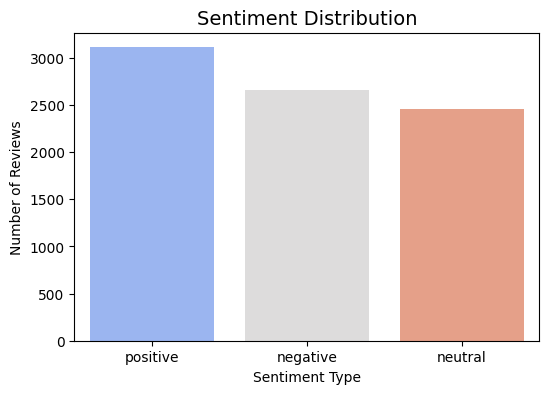

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()


Top 15 Common Keywords in Negative Reviews:
complete: 364
terrible: 364
total: 342
service: 294
money: 282
event: 280
waste: 267
product: 241
movie: 228
after: 216
staff: 215
restaurant: 192
time: 191
back: 186
went: 182


C:\Users\Ali\AppData\Local\Temp\ipykernel_46076\502174060.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w, _ in common_words], y=[f for _, f in common_words], palette="viridis")


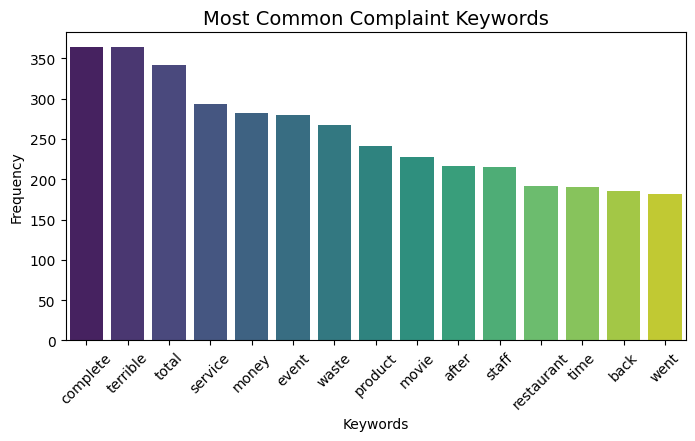

In [32]:
def extract_keywords(text):
    words = re.findall(r'\b[a-zA-Z]{4,}\b', text.lower())
    stopwords = {"this", "that", "have", "been", "with", "from", "they", "were", 
                 "very", "about", "their", "what", "there", "could", "would"}
    return [w for w in words if w not in stopwords]

# Extract keywords only from negative reviews
all_words = []
for review in df[df["sentiment"]=="negative"]["review"]:
    all_words.extend(extract_keywords(review))

# Count most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(15)

# Display
print("Top 15 Common Keywords in Negative Reviews:")
for word, count in common_words:
    print(f"{word}: {count}")

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(x=[w for w, _ in common_words], y=[f for _, f in common_words], palette="viridis")
plt.title("Most Common Complaint Keywords", fontsize=14)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [33]:
print("\n💡 Insights from Reviews:")

if "negative" in df["sentiment"].values:
    print("- Many reviews express negative sentiments, indicating dissatisfaction.")
    print("- Common issues revolve around poor organization, quality, and comfort.")

print("\n📋 Recommended Actions:")
recommendations = [
    "1️⃣ Improve event organization and management.",
    "2️⃣ Focus on better sound, seating, and cleanliness.",
    "3️⃣ Train staff for better professionalism and service.",
    "4️⃣ Enhance quality of content or performance.",
    "5️⃣ Offer refunds or discounts for poor experiences."
]

for rec in recommendations:
    print(rec)



💡 Insights from Reviews:
- Many reviews express negative sentiments, indicating dissatisfaction.
- Common issues revolve around poor organization, quality, and comfort.

📋 Recommended Actions:
1️⃣ Improve event organization and management.
2️⃣ Focus on better sound, seating, and cleanliness.
3️⃣ Train staff for better professionalism and service.
4️⃣ Enhance quality of content or performance.
5️⃣ Offer refunds or discounts for poor experiences.


In [34]:
df.to_csv("analyzed_feedback.csv", index=False)
print("✅ Results saved to 'analyzed_feedback.csv'")


✅ Results saved to 'analyzed_feedback.csv'
